<img src="IMG/logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales - Segundo Cuatrimestre 2025

# TS6: Respuesta en frecuencia de Filtros Pasivos RLC
#### Matías Cassino 

# Consignas
Considerando el circuito:

<img src="IMG/consigna_circuito_TS6.jpg"> 

1) Demostrar que la función de transferencia  $T(s)=\frac{V2(s)}{V1(s)}$
 se corresponde con una sección bicuadrática (SOS) $T(s)=k\frac{s^2+s\frac{ω_{0Z}}{Q_Z}+ω_{0Z}^2}{s^2+s\frac{ω_{0P}}{Q_P}+ω_{0P}^2}$

2) Parametrice los polinomios de segundo orden, hallando los parámetros $k$, $ω_{0Z}$, $Q_Z$, $ω_{0P}$, $Q_P$ en función de los elementos de la red.

3) Para cada función, utilice la red bicuadrática para implementarla:
- A: $T1(s)=\frac{s^2+9}{s^2+s√2+1}$
- B: $T2(s)=\frac{s^2+1/9}{s^2+s1/5+1}$
- C: $T3(s)=\frac{s^2+s1/5+1}{s^2+s√2+1}$

5) Dibuje el diagrama de polos y ceros de H(s). Indique la localización de polos y ceros en función de los parámetros.

6) Calcular y graficar la respuesta de módulo y fase, indicando la respuesta asintótica donde corresponda. 

Bonus:

1) ¿Cómo se podrían conectar en cascada $T_{1}(s)$
 y $T_{2}(s)$, y qué respuesta sería la resultante?

2) Simular las redes en LTspice


# Introducción

En este trabajó inicialmente se constató la correspondencia entre la función transferencia de un circuito RLC con una sección bicuadrática. Luego, se obtuvieron las frecuencias de resonancia, la ganancia y los factores de calidad en función de los parámetros del circuito asociados al levantamiento en potencia, y se hallaron los valores de resistencia, capacitancia e inductancia correspondientes a diversas funciones transferencia. También, se representó gráficamente la respuesta en frecuencia, la respuesta de fase y el diagrama de polos y ceros. Finalmente, se conectó en cascada dos de las transferencias para así analizar las respuestas mencionadas y simular el circuito.

# Desarrollo experimental

In [15]:
#%% Módulos
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from matplotlib import patches


#%% Funciones

plt.close('all')


def rta_frec_y_fase(b,a,worN,label):
    w,h=signal.freqs(b,a,worN)
    phase=np.unwrap(np.angle(h))
    
    # Gráfico de módulo
    plt.figure(figsize=(12,8))
    plt.subplot(1,2,1)
    plt.semilogx(w, 20*np.log10(abs(h)),label=label)
    plt.title('Respuesta en Magnitud')
    plt.xlabel('Pulsación angular [r/s]')
    plt.ylabel('|H(jω)| [dB]')
    plt.grid(True, which='both', ls=':')
    plt.legend()
    
    # Gráfico de fase
    plt.subplot(1,2,2)
    plt.semilogx(w, phase,label=label)
    plt.title('Respuesta de fase')
    plt.xlabel('Pulsación angular [r/s]')
    plt.ylabel('Fase [rad]')
    plt.grid(True, which='both', ls=':')
    plt.legend()
    
    return w,h,phase

def polos_y_ceros(b,a,axis,label):
    z,p,k=signal.tf2zpk(b, a) 
    
    # Diagrama de polos y ceros
    plt.figure()
    plt.plot(np.real(p), np.imag(p), 'x', markersize=10, label=f'{label} Polos')
    axes_hdl = plt.gca()
    if len(z) > 0:
        plt.plot(np.real(z), np.imag(z), 'o', markersize=10, fillstyle='none', label=f'{label} Ceros')
        plt.axhline(0, color='k', lw=0.5)
        plt.axvline(0, color='k', lw=0.5)
        unit_circle = patches.Circle((0, 0), radius=1, fill=False,
                                   color='gray', ls='dotted', lw=2)
        axes_hdl.add_patch(unit_circle)
        axes_hdl.add_patch(unit_circle)
        plt.axis(axis)
        plt.title('Diagrama de Polos y Ceros (plano s)')
        plt.xlabel('σ [rad/s]')
        plt.ylabel('jω [rad/s]')
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()    
    return z,p,k

#%% Función transferencia y parámetros
b1=[1,0,9]
a1=[1,np.sqrt(2),1]
worN1=np.logspace(-1,2,1000)
axis1=[-1.1, 1.1, -3.1, 3.1]


b2=[1,0,1/9]
a2=[1,1/5,1]
worN2=np.logspace(-1,2,1000)
axis2=[-1.1, 1.1, -1.1, 1.1]


b3=[1,1/5,1]
a3=[1,np.sqrt(2),1]
worN3=np.logspace(-1,2,1000)
axis3=[-1.1, 1.1, -1.1, 1.1]

# Producto en cascada: T_total(s) = T1(s)*T2(s)
b_total = np.polymul(b1, b2)
a_total = np.polymul(a1, a2)
worN_total = np.logspace(-1, 2, 1000)
axis_total=[-1.1, 1.1, -3.1, 3.1]

label=['T1(S)','T2(S)','T3(S)','T_total(S) = T1(S)*T2(S)']

# Análisis de resultados

1. Se analiza un circuito a partir de dos admitancias en serie compuestas por las reactancias asociadas a cada componente RLC ideal, es decir,
   $Z_{R}=R$, $Z_{L}=X_{L}=jwL$ y $Z_{C}=X_{C}=\frac{1}{jwC}$ a fin de obtener su función transferencia

In [2]:
from IPython.display import IFrame
IFrame("IMG/Consigna_1_TS6.pdf", width=1000, height=1000)

2. Se expresan los parámetros característicos de la red a partir de los elementos de la misma con el propósito de desarrollar la función transferencia en forma generalizada.

In [3]:
from IPython.display import IFrame
IFrame("IMG/Consigna_2_TS6.pdf", width=1000, height=1000)

3. Se obtienen los valores de los componentes RLC ponderando la red normalizada en impedancia, por ende, R=1Ω para cada una.

In [4]:
from IPython.display import IFrame
IFrame("IMG/Consigna_3_TS6.pdf", width=1000, height=1000)

4. Se desarrolla el diagrama de polos y cero de cada función transferencia considerando el régimen estacionario. Además, se comprende que los sistemas son estables debido a los coeficientes reales y negativos de cada denominador, lo cual se verifica analíticamente en el valor asociado a la parte real de los polos.

In [5]:
from IPython.display import IFrame
IFrame("IMG/Consigna_4_TS6.pdf", width=1000, height=1000)

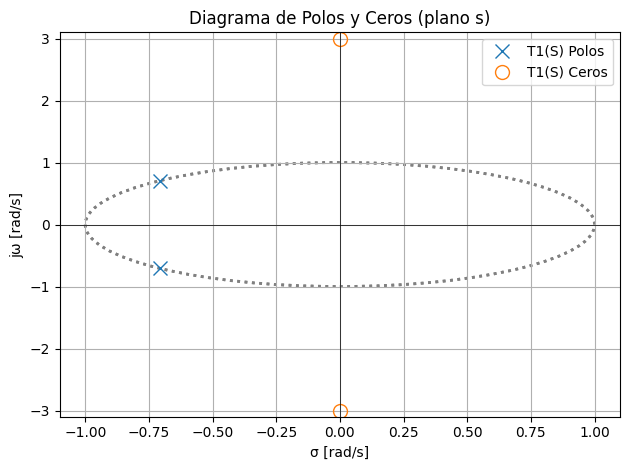

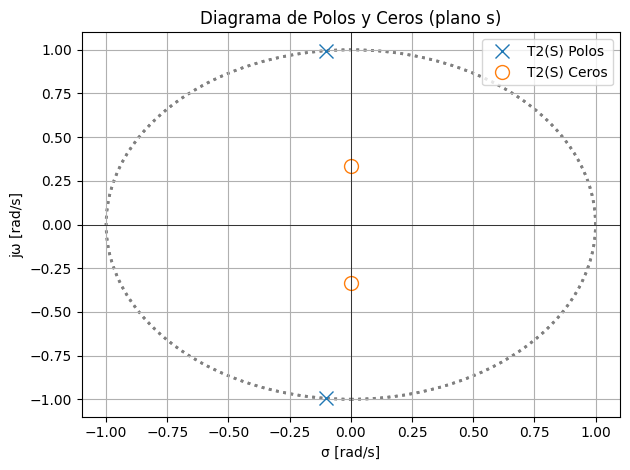

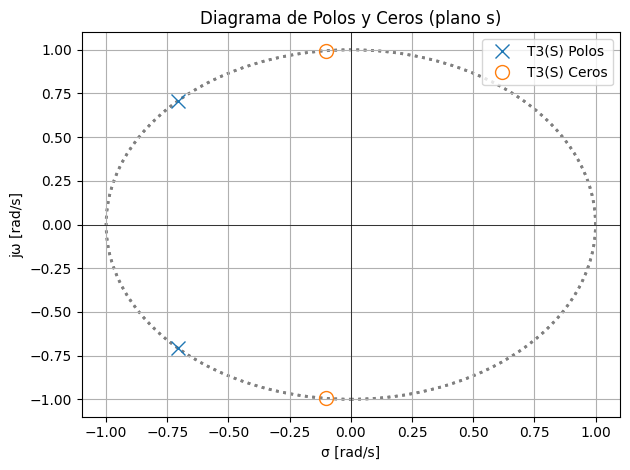

In [6]:
#%% Polos y ceros
z1,p1,k1=polos_y_ceros(b=b1,a=a1,axis=axis1,label=label[0])
z2,p2,k2=polos_y_ceros(b=b2,a=a2,axis=axis2,label=label[1])
z3,p3,k3=polos_y_ceros(b=b3,a=a3,axis=axis3,label=label[2])

5. Se expresan la respuesta de fase y módulo de cada función transferencia y analizan en los extremos, la frecuencia de resonancia y la frecuencia de los ceros. También, se infiere que las funciones transferencias se corresponden a filtros elimina banda (Notch) donde la frecuencia de los ceros coincide con la mínima atenuación y la frecuencia de resonancia se corresponde con la máxima ganancia si $\frac{w_{0P}}{Q_P}$ es menor a 1 y, por ende, disminuye el amortiguamiento.

In [7]:
from IPython.display import IFrame
IFrame("IMG/Consigna_5_TS6.pdf", width=1000, height=1000)

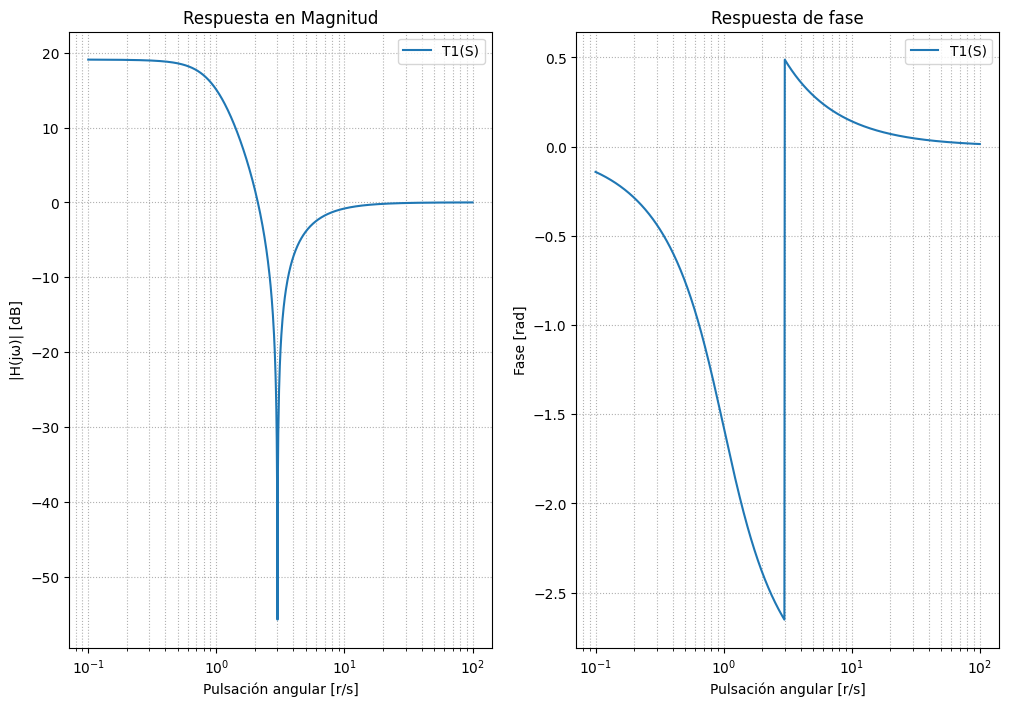

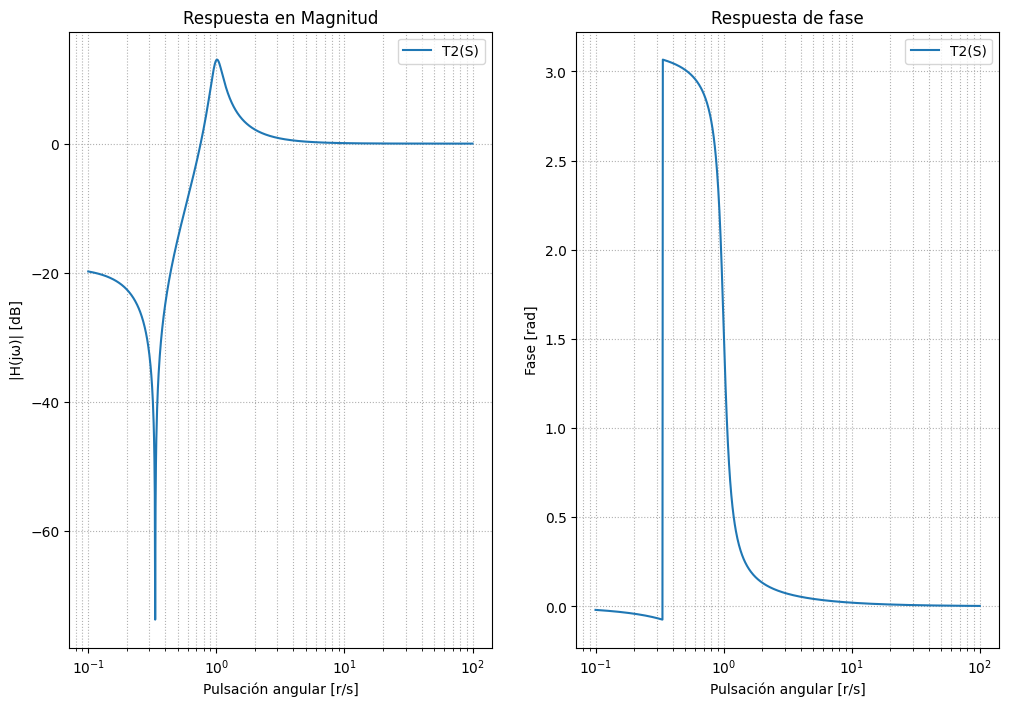

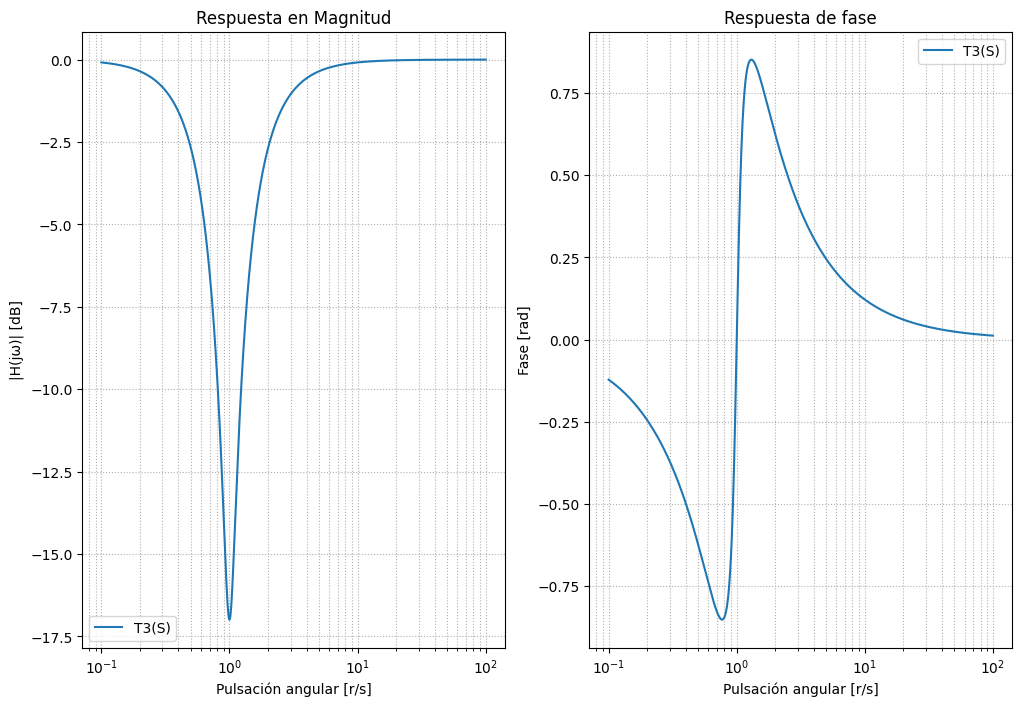

In [16]:
#%% RTA en frecuencia y de fase
w1,h1,phase1=rta_frec_y_fase(b=b1,a=a1,worN=worN1,label=label[0])
w2,h2,phase2=rta_frec_y_fase(b=b2,a=a2,worN=worN2,label=label[1])
w3,h3,phase3=rta_frec_y_fase(b=b3,a=a3,worN=worN3,label=label[2])

Bonus 1.
Se conectan en cascada las funciones transferencia por medio del producto de ambas y, en efecto, se preservan los polos y ceros de cada una, tal como se representa posteriormente en el diagrama, y resulta un filtro Notch dual de orden 4, que se refleja en los pozos infinitos de la respuesta en frecuencia. En adición, se reformula la expresión de la función haciendo hincapié en los ángulos asociados a los polos.

In [9]:
from IPython.display import IFrame
IFrame("IMG/Consigna_bonus1_TS6.pdf", width=1000, height=1000)

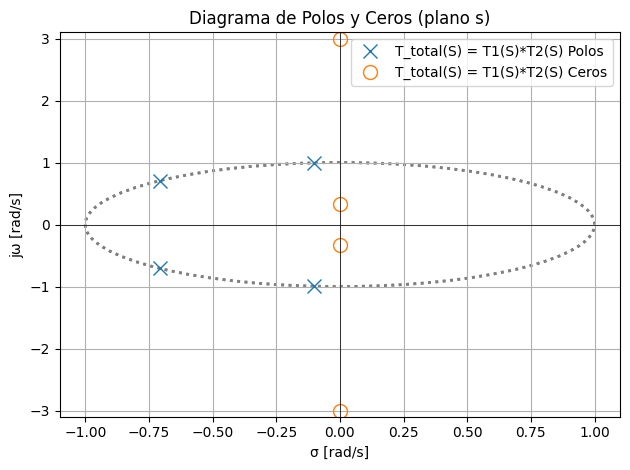

In [20]:
#%% Bonus 1
#%% Polos y ceros
z_total,p_total,k_total=polos_y_ceros(b=b_total,a=a_total,axis=axis_total,label=label[3])

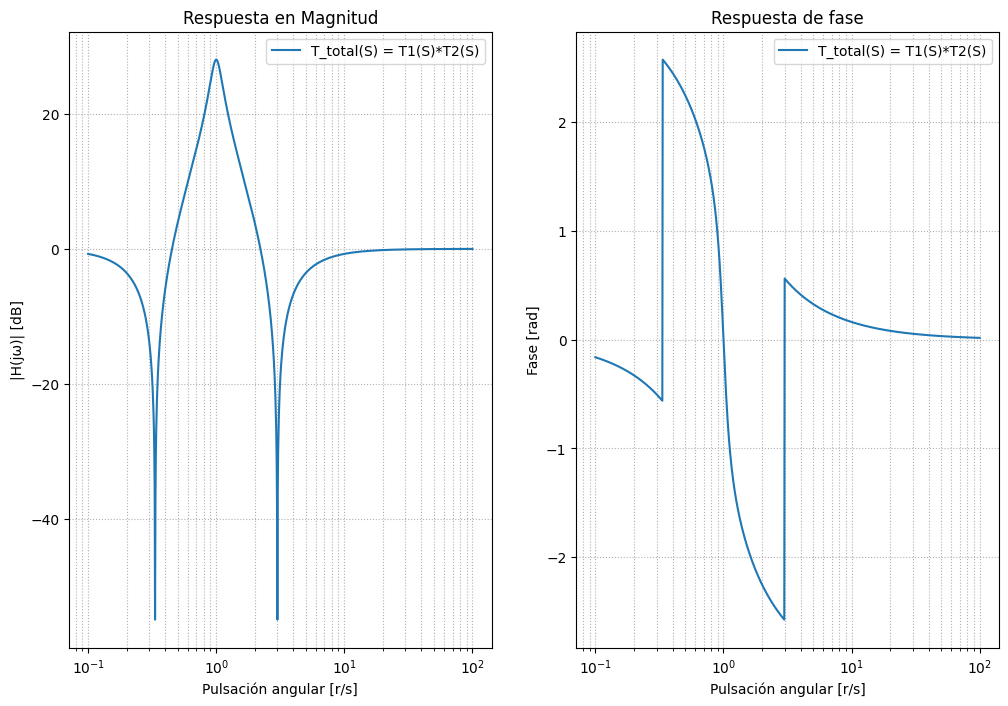

In [19]:
#%% Bonus 1
#%% RTA en frecuencia y de fase
w_total, h_total, phase_total = rta_frec_y_fase(b_total, a_total, worN_total, label=label[3])

Bonus 2.
Se representa gráficamente el circuito en cascada y se expone la respuesta resultante de su simulación en LTspice, la cual coincide con el gráfico de fase previo pero no con el de módulo a causa del desconocimiento respecto a la configuración de los parámetros en al programa. 

In [21]:
from IPython.display import IFrame
IFrame("IMG/Consigna_bonus2_TS6.pdf", width=1000, height=1000)

In [ ]:
from IPython.display import IFrame
IFrame("IMG/Consigna_bonus2_LT_TS6.pdf", width=1000, height=1000)

# Conclusiones
Finalmente, se deduce que las funciones de transferencia analizadas corresponden a filtros estables de tipo Notch, lo cual se evidencia en la máxima atenuación de ciertas frecuencias y la parte real negativa de los polos obtenidos. Además, se infiere que la conexión en cascada de dos secciones bicuadráticas de tipo Notch resulta en un Notch con efecto dual y orden equivalente a la suma de cada uno.

# Autoevaluación
A) Sí, resolví la tarea con seguridad.

B) Lo aprendido en esta tarea fueron la capacidad de obtener la función transferencia por medio de la representación esquemática de un circuito y el proceso de análisis de sus polos y ceros en conjunto a la respuesta de módulo y fase.

C) No fue utilizada ninguna IA.